In [51]:
import pandas as pd

# Read the .csv file
df = pd.read_csv('../data/cleaned/appended_data.csv')

# Filter the rows where Postal Code is not a 4-digit number
invalid_postal_codes = df[~df['Postal Code'].astype(str).str.match(r'^\d{4}$')]

# Delete the rows with invalid Postal Codes
df = df.drop(invalid_postal_codes.index)

# Save the updated DataFrame as a new file
df.to_csv('rawdata2.csv', index=False)


**Time to mess with our data**

In [109]:
import pandas as pd
import plotly.graph_objects as go

# Read the .csv file
df = pd.read_csv("../data/cleaned/data.csv")

# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis'))

# Set the title and axis labels
fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

# Show the plot
fig.show()

C:\Users\Meowsu\AppData\Local\Temp\ipykernel_15496\3654629580.py:5: DtypeWarning:

Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.



C:\Users\Meowsu\AppData\Local\Temp\ipykernel_15496\577240175.py:7: DtypeWarning:

Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Meowsu\AppData\Local\Temp\ipykernel_15496\577240175.py:9: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: xlabel='Longitude', ylabel='Latitude'>

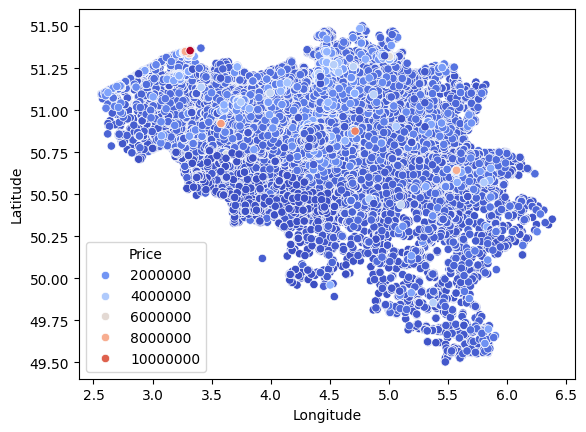

In [111]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


# Read the .csv file
data = pd.read_csv('../data/cleaned/data.csv')

data["Sea view"] = data["Sea view"].fillna(False)
data["Sea view"] = data["Sea view"].map({False: 0, True: 1})

data = data[data["Latitude"] >= 49]
data = data[data["Latitude"] <= 52]

df = data.loc[:, ['Price', 'Habitable Surface', 'Bedroom Count', 'State of Building', 'Kitchen Type', 'Latitude', 'Longitude']]

# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis'))

# Set the title and axis labels
fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

# Show the plot
fig.show()

sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Price", palette="coolwarm")

In [112]:
missing_proportion = data.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)

data.loc[data['Kitchen'] == 0, 'Kitchen Type'] = 0



Kitchen Surface      72.520242
Living Surface       65.454495
Kitchen Type         46.362093
Heating Type         46.156200
Consumption          40.165827
Build Year           40.048969
State of Building    37.939957
EPC                  36.011797
Facades              35.986756
Toilet Count         32.344676
Price per sqm        25.661501
Bathroom Count       16.106953
Terrace Surface      15.567180
Habitable Surface    10.942934
Room Count            1.844690
Garden Surface        1.154670
Bedroom Count         0.456303
Cadastral Income      0.002782
Subtype               0.001391
Municipality          0.000000
Longitude             0.000000
Province              0.000000
Latitude              0.000000
url                   0.000000
Sea view              0.000000
Region                0.000000
ID                    0.000000
Swimming Pool         0.000000
Garden Exists         0.000000
Terrace               0.000000
Locality              0.000000
Openfire              0.000000
Furnishe

In [114]:
columns_to_drop = ['Kitchen Surface', 'Living Surface', 'Heating Type', 'Toilet Count', 'Bathroom Count', 'ID', 'Kitchen', 'Furnished', 'Openfire', 'Fireplace Count', 'Terrace', 'Garden Exists', 'Cadastral Income', 'Consumption Per m2', 'Price per sqm', "Room Count", 'url', "Consumption", "Sea view", "Build Year", "Postal Code"]
df2 = data.drop(columns_to_drop, axis=1, errors='ignore')
missing_proportion = df2.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)


# Filter the dataframe to include only numeric columns
numeric_df = df2.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale="Viridis",
    )
)

# Set the title and axis labels
fig.update_layout(
    title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features"
)

# Show the plot
fig.show()

State of Building    37.939957
EPC                  36.011797
Facades              35.986756
Terrace Surface      15.567180
Habitable Surface    10.942934
Garden Surface        1.154670
Bedroom Count         0.456303
Subtype               0.001391
Province              0.000000
Municipality          0.000000
Longitude             0.000000
Latitude              0.000000
Locality              0.000000
Swimming Pool         0.000000
Kitchen Type          0.000000
Sale Type             0.000000
Price                 0.000000
Type                  0.000000
Region                0.000000
dtype: float64


In [115]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(df2[["Region"]])
ohetransform

,Region_Brussels,Region_Flanders,Region_Wallonia
2,0.0,0.0,1.0
8,0.0,0.0,1.0
13,0.0,0.0,1.0
16,0.0,0.0,1.0
17,0.0,0.0,1.0
...,...,...,...
88851,0.0,0.0,1.0
88853,0.0,0.0,1.0
88854,0.0,0.0,1.0
88855,0.0,0.0,1.0


In [116]:
df3 = pd.concat([df2, ohetransform], axis=1).drop("Region", axis=1)

# Filter the dataframe to include only numeric columns
numeric_df = df3.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale="Viridis",
    )
)

# Set the title and axis labels
fig.update_layout(
    title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features"
)

# Show the plot
fig.show()

In [117]:
missing_proportion = numeric_df.isnull().mean()
missing_proportion_sorted = missing_proportion.sort_values(ascending=False) * 100
print(missing_proportion_sorted)

correlation_matrix = numeric_df.corr()

correlation_with_price = correlation_matrix['Price'].drop('Price')

correlation_with_price_sorted = correlation_with_price.sort_values(ascending=False)

print(correlation_with_price_sorted)

State of Building    37.939957
EPC                  36.011797
Facades              35.986756
Terrace Surface      15.567180
Habitable Surface    10.942934
Garden Surface        1.154670
Bedroom Count         0.456303
Price                 0.000000
Kitchen Type          0.000000
Swimming Pool         0.000000
Latitude              0.000000
Longitude             0.000000
Region_Brussels       0.000000
Region_Flanders       0.000000
Region_Wallonia       0.000000
dtype: float64
Habitable Surface    0.375115
Bedroom Count        0.333918
Latitude             0.235941
Region_Flanders      0.171158
Swimming Pool        0.170202
Facades              0.143056
State of Building    0.098778
Kitchen Type         0.084432
Garden Surface       0.083212
Terrace Surface      0.075138
Region_Brussels      0.052408
Longitude           -0.129484
EPC                 -0.139307
Region_Wallonia     -0.211729
Name: Price, dtype: float64


In [119]:
df3 = df3.dropna(subset=['Price'])


dataframe = df3.loc[:, ['Price', 'Habitable Surface', 'Bedroom Count', 'State of Building', 'Kitchen Type', 'Region_Flanders', 'Region_Brussels', 'Region_Wallonia', 'Swimming Pool', 'Terrace Surface', 'Garden Surface', 'EPC', 'Facades', 'Latitude', 'Longitude']]
X = dataframe.drop('Price', axis=1)
y = dataframe['Price']
X.shape, y.shape

((71882, 20), (71882,))

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57505, 20), (14377, 20), (57505,), (14377,))

In [121]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_x_train = impute_knn.fit_transform(X_train)
imputed_x_test = impute_knn.fit_transform(X_test)

ValueError: could not convert string to float: 'Lier'

In [32]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [33]:
regression.fit(imputed_x_train, y_train)
y_pred = regression.predict(imputed_x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = regression.intercept_

print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Intercept: {intercept:.2f}')

R^2: 0.39
MSE: 83592685087.18
MAE: 147169.45
Intercept: -53620.86


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

results = {}

for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    X_train.shape, X_test.shape, y_train.shape, y_test.shape

    impute_knn = KNNImputer(n_neighbors=5)
    imputed_x_train = impute_knn.fit_transform(X_train)
    imputed_x_test = impute_knn.fit_transform(X_test)

    regression = LinearRegression()
    regression.fit(imputed_x_train, y_train)
    y_pred = regression.predict(imputed_x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    intercept = regression.intercept_

    results[i] = {"R2": r2, "MSE": mse, "MAE": mae, "Intercept": intercept}

results

{1: {'R2': 0.34250056652888605,
  'MSE': 75405061405.83162,
  'MAE': 141101.4069079268,
  'Intercept': -87845.75100676483},
 2: {'R2': 0.20707373950000474,
  'MSE': 216412591716.0935,
  'MAE': 152844.0135951286,
  'Intercept': -66909.23611911427},
 3: {'R2': 0.21763463684346596,
  'MSE': 179175171474.17175,
  'MAE': 147800.29449956788,
  'Intercept': -82439.48929277324},
 4: {'R2': 0.2052134921223776,
  'MSE': 188933120725.89935,
  'MAE': 149648.093618795,
  'Intercept': -86705.20836711436},
 5: {'R2': 0.4309149320601361,
  'MSE': 63594592252.78752,
  'MAE': 140932.71995226253,
  'Intercept': -87189.05378785357},
 6: {'R2': 0.3319204220714189,
  'MSE': 84286836006.16302,
  'MAE': 137417.70205666212,
  'Intercept': -83404.39862208418},
 7: {'R2': -0.04957380657119326,
  'MSE': 144440674421.5585,
  'MAE': 140953.1592050587,
  'Intercept': -88310.16998962418},
 8: {'R2': 0.29827545028040925,
  'MSE': 85166358890.92465,
  'MAE': 144842.9666631647,
  'Intercept': -113307.00152040331},
 9: {

In [38]:
results = {
    1: {
        "R2": 0.34250056652888605,
        "MSE": 75405061405.83162,
        "MAE": 141101.4069079268,
        "Intercept": -87845.75100676483,
    },
    2: {
        "R2": 0.20707373950000474,
        "MSE": 216412591716.0935,
        "MAE": 152844.0135951286,
        "Intercept": -66909.23611911427,
    },
    3: {
        "R2": 0.21763463684346596,
        "MSE": 179175171474.17175,
        "MAE": 147800.29449956788,
        "Intercept": -82439.48929277324,
    },
    4: {
        "R2": 0.2052134921223776,
        "MSE": 188933120725.89935,
        "MAE": 149648.093618795,
        "Intercept": -86705.20836711436,
    },
    5: {
        "R2": 0.4309149320601361,
        "MSE": 63594592252.78752,
        "MAE": 140932.71995226253,
        "Intercept": -87189.05378785357,
    },
    6: {
        "R2": 0.3319204220714189,
        "MSE": 84286836006.16302,
        "MAE": 137417.70205666212,
        "Intercept": -83404.39862208418,
    },
    7: {
        "R2": -0.04957380657119326,
        "MSE": 144440674421.5585,
        "MAE": 140953.1592050587,
        "Intercept": -88310.16998962418,
    },
    8: {
        "R2": 0.29827545028040925,
        "MSE": 85166358890.92465,
        "MAE": 144842.9666631647,
        "Intercept": -113307.00152040331,
    },
    9: {
        "R2": 0.3975970229093897,
        "MSE": 62130758150.85783,
        "MAE": 143285.0433520249,
        "Intercept": -100164.78828128806,
    },
    10: {
        "R2": 0.3669633556477806,
        "MSE": 89156304727.60979,
        "MAE": 142709.89625197233,
        "Intercept": -80424.69513195922,
    },
    11: {
        "R2": 0.01358487099707728,
        "MSE": 117096842479.60736,
        "MAE": 141333.47852672279,
        "Intercept": -83418.24755605886,
    },
    12: {
        "R2": 0.39880663266116123,
        "MSE": 66426610643.52991,
        "MAE": 141813.29210832383,
        "Intercept": -93040.98710143432,
    },
    13: {
        "R2": 0.38434303266611103,
        "MSE": 81306685792.2989,
        "MAE": 141557.60164965564,
        "Intercept": -74039.02279245504,
    },
    14: {
        "R2": -0.023223875196495936,
        "MSE": 128899934718.26888,
        "MAE": 147386.31742514955,
        "Intercept": -127868.43453839998,
    },
    15: {
        "R2": 0.30819171452745997,
        "MSE": 77724130594.2958,
        "MAE": 143330.9033519555,
        "Intercept": -91490.7320937714,
    },
    16: {
        "R2": 0.29819505409027025,
        "MSE": 98423585846.44453,
        "MAE": 143007.70558497074,
        "Intercept": -82816.31785251998,
    },
    17: {
        "R2": 0.36402980549493047,
        "MSE": 68087399928.88914,
        "MAE": 142076.17513485093,
        "Intercept": -78254.98649535794,
    },
    18: {
        "R2": 0.21291463314795533,
        "MSE": 193237972587.6206,
        "MAE": 146605.55707475598,
        "Intercept": -70615.25136397587,
    },
    19: {
        "R2": 0.43800280697105964,
        "MSE": 65551663660.19497,
        "MAE": 141609.1784759577,
        "Intercept": -97526.69428523781,
    },
    20: {
        "R2": 0.1797100380802067,
        "MSE": 193853001910.86823,
        "MAE": 146173.0310858644,
        "Intercept": -83130.08860118518,
    },
    21: {
        "R2": 0.3243625508367419,
        "MSE": 83443010817.21072,
        "MAE": 141551.54751206478,
        "Intercept": -76221.29461150477,
    },
    22: {
        "R2": 0.3789907416643523,
        "MSE": 87580301517.75612,
        "MAE": 141750.61850219063,
        "Intercept": -80803.96939373453,
    },
    23: {
        "R2": 0.04243734521994669,
        "MSE": 134919102944.20523,
        "MAE": 142046.1394214853,
        "Intercept": -100766.79860708286,
    },
    24: {
        "R2": 0.39317170484893027,
        "MSE": 96513723914.82466,
        "MAE": 145797.42728376164,
        "Intercept": -54935.72001083061,
    },
    25: {
        "R2": 0.40640516224567125,
        "MSE": 79817251355.3415,
        "MAE": 147136.91338031844,
        "Intercept": -94947.85229622066,
    },
    26: {
        "R2": 0.316712057713865,
        "MSE": 85862807425.82468,
        "MAE": 144681.75733004865,
        "Intercept": -90623.91844990198,
    },
    27: {
        "R2": 0.34011760141109393,
        "MSE": 85738217864.12534,
        "MAE": 143478.1618893551,
        "Intercept": -84724.84283569118,
    },
    28: {
        "R2": 0.4034960564361615,
        "MSE": 83079681804.77551,
        "MAE": 148781.79667558,
        "Intercept": -84230.85979907657,
    },
    29: {
        "R2": 0.21378538974044947,
        "MSE": 188207979991.0133,
        "MAE": 148872.16020208353,
        "Intercept": -71078.32013866067,
    },
    30: {
        "R2": 0.2312633916704272,
        "MSE": 164935076764.81375,
        "MAE": 141230.2763297999,
        "Intercept": -93530.83293435251,
    },
    31: {
        "R2": 0.3724263534496596,
        "MSE": 78794581572.17285,
        "MAE": 143599.13089582048,
        "Intercept": -69152.14189923467,
    },
    32: {
        "R2": 0.3231939095680706,
        "MSE": 88715383020.29103,
        "MAE": 142939.2773727479,
        "Intercept": -94046.24142579344,
    },
    33: {
        "R2": 0.3989198764277555,
        "MSE": 66407105185.37667,
        "MAE": 143751.0790810872,
        "Intercept": -92340.68065900751,
    },
    34: {
        "R2": 0.2029527269809801,
        "MSE": 208473714861.4094,
        "MAE": 153039.19540496595,
        "Intercept": -68894.3084469763,
    },
    35: {
        "R2": 0.3879690844899789,
        "MSE": 69135184389.22235,
        "MAE": 145646.312332179,
        "Intercept": -93804.29758027615,
    },
    36: {
        "R2": 0.40589399765245426,
        "MSE": 90418129953.51968,
        "MAE": 145321.5382959029,
        "Intercept": -65402.88219250552,
    },
    37: {
        "R2": 0.34286370534040433,
        "MSE": 79266035292.12514,
        "MAE": 142892.1793920681,
        "Intercept": -67103.71129575634,
    },
    38: {
        "R2": 0.42910589200644855,
        "MSE": 73543362453.89813,
        "MAE": 145160.00592339743,
        "Intercept": -87963.44939576887,
    },
    39: {
        "R2": 0.2862626141116392,
        "MSE": 70483466889.0302,
        "MAE": 139527.28908045767,
        "Intercept": -98878.48184279964,
    },
    40: {
        "R2": 0.30953082980751867,
        "MSE": 85062885068.36606,
        "MAE": 140342.3863970675,
        "Intercept": -79914.55678181339,
    },
    41: {
        "R2": 0.3332632250085342,
        "MSE": 79615574985.02434,
        "MAE": 140265.44781650495,
        "Intercept": -93558.13049323321,
    },
    42: {
        "R2": 0.38496926744261883,
        "MSE": 69229282273.90446,
        "MAE": 144448.7975110836,
        "Intercept": -94013.08891473786,
    },
    43: {
        "R2": 0.22328030868966353,
        "MSE": 179736751654.74765,
        "MAE": 145687.56894107402,
        "Intercept": -64861.741775385686,
    },
    44: {
        "R2": 0.28347547880217394,
        "MSE": 82656876393.61177,
        "MAE": 141080.18411452265,
        "Intercept": -84088.48297859164,
    },
    45: {
        "R2": 0.08741188733188354,
        "MSE": 204366135056.65125,
        "MAE": 141435.7688517294,
        "Intercept": -68730.70172156848,
    },
    46: {
        "R2": 0.3361207130389128,
        "MSE": 79945145641.23175,
        "MAE": 147108.82934220432,
        "Intercept": -93610.6237715765,
    },
    47: {
        "R2": 0.255207798158789,
        "MSE": 106246653660.56041,
        "MAE": 142975.293623524,
        "Intercept": -58276.49743530172,
    },
    48: {
        "R2": 0.16579913837850346,
        "MSE": 206030673805.0059,
        "MAE": 148437.84910264885,
        "Intercept": -69894.90256137418,
    },
    49: {
        "R2": 0.4001345815225217,
        "MSE": 89958664956.25806,
        "MAE": 146208.44166928716,
        "Intercept": -67187.08170530642,
    },
    50: {
        "R2": 0.21009393532785203,
        "MSE": 178941671503.92847,
        "MAE": 146405.2606438811,
        "Intercept": -92362.11212238116,
    },
    51: {
        "R2": 0.192228813044375,
        "MSE": 183212403106.88068,
        "MAE": 145608.65683513012,
        "Intercept": -78181.00192152098,
    },
    52: {
        "R2": 0.35154732170364567,
        "MSE": 81841481311.35127,
        "MAE": 149797.6097273357,
        "Intercept": -86246.45475238323,
    },
    53: {
        "R2": 0.3894016849842463,
        "MSE": 83592685087.18494,
        "MAE": 147169.44924513221,
        "Intercept": -53620.85516445903,
    },
    54: {
        "R2": 0.3320849409187143,
        "MSE": 72400516218.10814,
        "MAE": 139515.53729509356,
        "Intercept": -89339.62753601186,
    },
    55: {
        "R2": 0.3543725001752701,
        "MSE": 96867463668.23155,
        "MAE": 144811.52142454468,
        "Intercept": -49000.098525446665,
    },
    56: {
        "R2": 0.3447845190226736,
        "MSE": 87677407996.90184,
        "MAE": 138495.7357012256,
        "Intercept": -70934.41433680744,
    },
    57: {
        "R2": 0.18405881049157669,
        "MSE": 211532956470.14737,
        "MAE": 147244.6062893895,
        "Intercept": -78641.42036459892,
    },
    58: {
        "R2": 0.3915261115865658,
        "MSE": 83405472294.28331,
        "MAE": 142358.91063539177,
        "Intercept": -67698.21320684388,
    },
    59: {
        "R2": 0.3347596010672299,
        "MSE": 93729088617.14787,
        "MAE": 145170.37473077423,
        "Intercept": -83472.37767324492,
    },
    60: {
        "R2": 0.34913813691273177,
        "MSE": 106106428666.844,
        "MAE": 145505.04153001076,
        "Intercept": -45216.85200384993,
    },
    61: {
        "R2": 0.38415146792687915,
        "MSE": 79304095916.4757,
        "MAE": 148189.47756135746,
        "Intercept": -108597.1024788816,
    },
    62: {
        "R2": 0.3726656618999339,
        "MSE": 82860317070.4679,
        "MAE": 144947.04812210085,
        "Intercept": -82574.78908848827,
    },
    63: {
        "R2": 0.30624781237065146,
        "MSE": 89365559116.28963,
        "MAE": 143240.60188613101,
        "Intercept": -70212.67830096663,
    },
    64: {
        "R2": 0.179812057730394,
        "MSE": 195017680094.35983,
        "MAE": 146595.01593986983,
        "Intercept": -54664.874440970016,
    },
    65: {
        "R2": 0.19410968593561484,
        "MSE": 191387099967.2781,
        "MAE": 150026.34688830393,
        "Intercept": -96757.8525835473,
    },
    66: {
        "R2": 0.4004799287416594,
        "MSE": 65954926624.029274,
        "MAE": 139023.6437444736,
        "Intercept": -67437.51606563071,
    },
    67: {
        "R2": 0.3583822002710436,
        "MSE": 78172760314.5747,
        "MAE": 144096.5863668733,
        "Intercept": -99225.52921289392,
    },
    68: {
        "R2": 0.3333243326901213,
        "MSE": 96885241112.79811,
        "MAE": 148636.27019590331,
        "Intercept": -94443.10500628111,
    },
    69: {
        "R2": 0.202902892871606,
        "MSE": 193138332433.24368,
        "MAE": 149948.04518456612,
        "Intercept": -77389.53752064175,
    },
    70: {
        "R2": 0.41405719103649763,
        "MSE": 79429590154.23155,
        "MAE": 138570.64408457512,
        "Intercept": -66726.9042827313,
    },
    71: {
        "R2": 0.3906351041258207,
        "MSE": 69591870989.28236,
        "MAE": 143395.2458733723,
        "Intercept": -99745.78365111083,
    },
    72: {
        "R2": 0.1881408415082364,
        "MSE": 219214195755.77686,
        "MAE": 151429.49996244712,
        "Intercept": -79973.4367543452,
    },
    73: {
        "R2": 0.40223277909336486,
        "MSE": 82938878145.7914,
        "MAE": 147594.52142152438,
        "Intercept": -96619.0995530234,
    },
    74: {
        "R2": 0.34329939805395193,
        "MSE": 80101890081.67934,
        "MAE": 143982.78636935048,
        "Intercept": -86718.23895797977,
    },
    75: {
        "R2": -0.005655217221203657,
        "MSE": 114476453077.1507,
        "MAE": 142725.2750738676,
        "Intercept": -107614.79072727449,
    },
    76: {
        "R2": -0.04538278068998425,
        "MSE": 136740233335.81985,
        "MAE": 147055.9952945319,
        "Intercept": -94920.54138315917,
    },
    77: {
        "R2": 0.30562939965859837,
        "MSE": 89980536113.16684,
        "MAE": 145196.90395598137,
        "Intercept": -101826.49343027594,
    },
    78: {
        "R2": 0.4495561975378424,
        "MSE": 63436564789.14888,
        "MAE": 140768.1661447262,
        "Intercept": -73652.90302074043,
    },
    79: {
        "R2": 0.17308267973166214,
        "MSE": 209517573393.7747,
        "MAE": 151526.50880168332,
        "Intercept": -75721.11948309472,
    },
    80: {
        "R2": 0.3950476759635514,
        "MSE": 80068192626.97539,
        "MAE": 146576.68819871114,
        "Intercept": -73838.83252078248,
    },
    81: {
        "R2": 0.1944045821380893,
        "MSE": 172673390333.53244,
        "MAE": 145979.9623772459,
        "Intercept": -97014.94101173745,
    },
    82: {
        "R2": 0.3583766631565146,
        "MSE": 78038085469.43318,
        "MAE": 141370.19892592178,
        "Intercept": -85192.71428568679,
    },
    83: {
        "R2": 0.36322138125151116,
        "MSE": 81034650625.63971,
        "MAE": 141876.34319847022,
        "Intercept": -97732.56662316265,
    },
    84: {
        "R2": 0.44684922980259145,
        "MSE": 68806409681.27782,
        "MAE": 141925.347457708,
        "Intercept": -81014.43645741412,
    },
    85: {
        "R2": 0.41105674130590586,
        "MSE": 82177939751.28598,
        "MAE": 143877.14682586546,
        "Intercept": -94006.669271741,
    },
    86: {
        "R2": 0.4335403912288819,
        "MSE": 60754092564.31781,
        "MAE": 137482.9119702045,
        "Intercept": -62504.897490365605,
    },
    87: {
        "R2": 0.32586811918726855,
        "MSE": 103726560510.0192,
        "MAE": 142575.49901693198,
        "Intercept": -78381.47936456517,
    },
    88: {
        "R2": 0.37030909234372245,
        "MSE": 62018671513.403885,
        "MAE": 136719.8148166344,
        "Intercept": -84892.36656182935,
    },
    89: {
        "R2": 0.41034535666899774,
        "MSE": 81445004555.35995,
        "MAE": 141795.0553102293,
        "Intercept": -74366.1079941467,
    },
    90: {
        "R2": 0.3910495686784642,
        "MSE": 89183240051.3785,
        "MAE": 147178.6791639831,
        "Intercept": -86417.29686378216,
    },
    91: {
        "R2": 0.41100742044347505,
        "MSE": 67806666589.827805,
        "MAE": 138833.31189546068,
        "Intercept": -93242.42869155877,
    },
    92: {
        "R2": 0.29282466334755164,
        "MSE": 95949275578.0839,
        "MAE": 142669.02023801595,
        "Intercept": -87170.05266533192,
    },
    93: {
        "R2": 0.168749403741265,
        "MSE": 185947803399.04626,
        "MAE": 143193.1524853353,
        "Intercept": -80635.20708627207,
    },
    94: {
        "R2": 0.35787528630369303,
        "MSE": 87857818662.64267,
        "MAE": 145733.3805249492,
        "Intercept": -77256.47357712337,
    },
    95: {
        "R2": 0.4495578063403024,
        "MSE": 56257922811.74449,
        "MAE": 138135.32552449172,
        "Intercept": -79462.75472398638,
    },
    96: {
        "R2": 0.43959507183793023,
        "MSE": 66838835455.80135,
        "MAE": 140592.52280866416,
        "Intercept": -92190.74720750586,
    },
    97: {
        "R2": 0.3731849188318537,
        "MSE": 80809281132.47588,
        "MAE": 142312.35849086664,
        "Intercept": -79492.23827977263,
    },
    98: {
        "R2": 0.3386439140646045,
        "MSE": 97591607271.05649,
        "MAE": 144316.46105464458,
        "Intercept": -78392.35766728024,
    },
    99: {
        "R2": 0.21344581905463367,
        "MSE": 182334320832.55698,
        "MAE": 144526.1333133416,
        "Intercept": -73906.22883860854,
    },
}

highest_r2 = max(results, key=lambda x: results[x]['R2'])
highest_r2_value = results[highest_r2]['R2']

print(f"The highest R2 value is {highest_r2_value} for model {highest_r2}.")

The highest R2 value is 0.4495578063403024 for model 95.


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=95
    )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

impute_knn = KNNImputer(n_neighbors=5)
imputed_x_train = impute_knn.fit_transform(X_train)
imputed_x_test = impute_knn.fit_transform(X_test)

regression = LinearRegression()
regression.fit(imputed_x_train, y_train)
y_pred = regression.predict(imputed_x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = regression.intercept_

print(f'R^2: {r2:.2f}')


R^2: 0.45


In [43]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(scoring="r2", generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(imputed_x_train, y_train)
print(tpot.score(imputed_x_test, y_test))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.49803360067964997

Generation 2 - Current best internal CV score: 0.49803360067964997

Generation 3 - Current best internal CV score: 0.5046861691071719


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=17, n_estimators=100)
0.6361867006604418


In [46]:
# Assuming `X_train` is your training data and `y_train` are the actual values
y_train_pred = regression.predict(imputed_x_train)
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.30315657705137855

In [42]:
tpot.export("tpot_house market_pipeline.py")

In [40]:
from sklearn.metrics import r2_score

accuracy_score = r2_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)


Accuracy Score: 0.4495578063403024


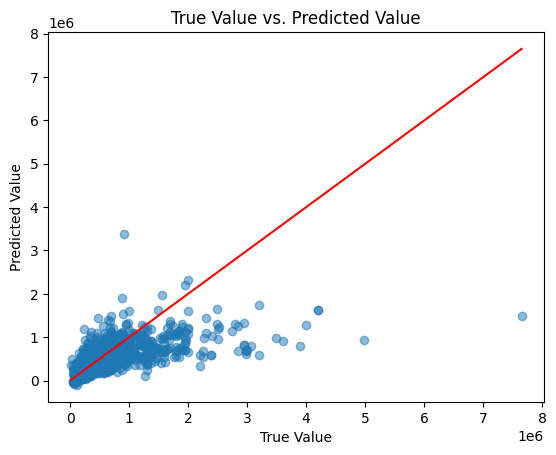

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs. Predicted Value')
plt.show()

Text(0.5, 1.0, 'Predicted Value vs. Residuals')

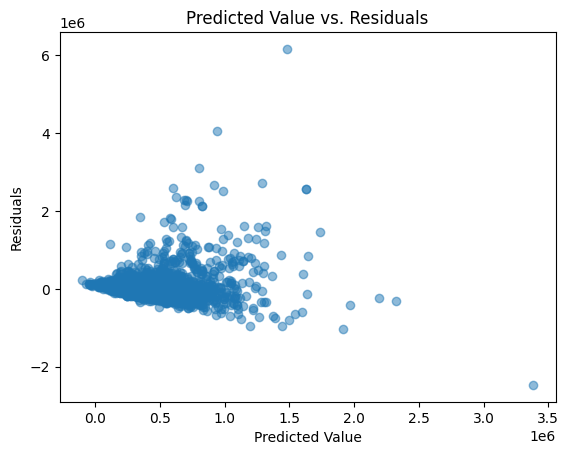

In [36]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Predicted Value vs. Residuals')

In [112]:
from sklearn.preprocessing import StandardScaler
dataframe1 = data.loc[:, ['Price', 'Habitable Surface', 'Room Count', 'State of Building', 'Kitchen Type']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe1)
frame1 = pd.DataFrame(data=scaled_data, columns=dataframe1.columns)
frame1.head()

,Price,Habitable Surface,Room Count,State of Building,Kitchen Type
0,-0.538964,-0.240132,0.351469,-0.596208,-0.21318
1,-0.232746,-0.085528,0.351469,-0.596208,-0.21318
2,0.168681,-0.085528,-0.018843,-0.596208,-0.21318
3,-0.654760,-0.443559,-0.389154,-0.596208,-0.21318
4,-0.361409,-0.524930,-0.018843,-0.596208,-0.21318


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


regression = LinearRegression()
X = frame1.drop('Price', axis=1)
y = frame1['Price']
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = regression.intercept_

print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Intercept: {intercept:.2f}')

R^2: 0.37
MSE: 0.48
MAE: 0.37
Intercept: 0.00
